<a href="https://colab.research.google.com/github/swastikbanerjee/Projects_ML/blob/main/MathScorePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/StudentsPerformance.csv")

In [ ]:
data.shape

(1000, 8)

In [ ]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
data_encoded = pd.get_dummies(data,columns=['gender','race/ethnicity','parental level of education','lunch','test preparation course'])

In [ ]:
data_encoded.head()

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score

X = data_encoded.drop('math score', axis=1)
y = data_encoded['math score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
dt_predictions = dt_regressor.predict(X_test)
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_mae

6.145

In [ ]:
log_reg_predictions = log_reg.predict(X_test)
log_reg_mae = mean_absolute_error(y_test, log_reg_predictions)
log_reg_mae

7.585

In [ ]:
rf_predictions = rf_regressor.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mae

4.629933333333333

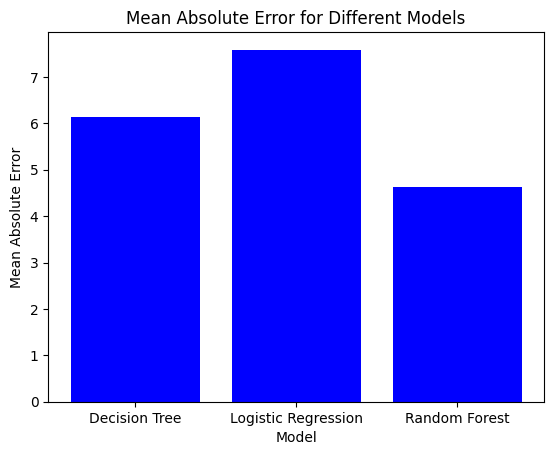

In [ ]:
model_names = ['Decision Tree', 'Logistic Regression', 'Random Forest']
mae_values = [dt_mae, log_reg_mae, rf_mae]

plt.bar(model_names, mae_values, color='blue')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error for Different Models')
plt.show()

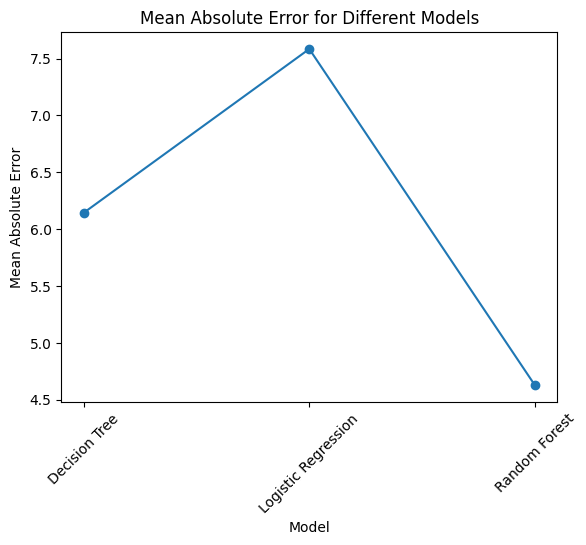

In [ ]:
model_names = ['Decision Tree', 'Logistic Regression', 'Random Forest']
mae_values = [dt_mae, log_reg_mae, rf_mae]

plt.plot(model_names, mae_values, marker='o')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error for Different Models')
plt.xticks(rotation=45)
plt.show()

In [ ]:
low_threshold = 40
high_threshold = 80

y_classes = []
for score in y:
    if score < low_threshold:
        y_classes.append('Low')
    elif score < high_threshold:
        y_classes.append('Medium')
    else:
        y_classes.append('High')

X_train, X_test, y_train, y_test = train_test_split(X, y_classes, test_size=0.2, random_state=42)

# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision_micro = precision_score(y_test, dt_predictions, average='micro')
dt_f1_micro = f1_score(y_test, dt_predictions, average='micro')

print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Precision (micro):", dt_precision_micro)
print("Decision Tree F1 Score (micro):", dt_f1_micro)
print("")

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
log_reg_predictions = log_reg.predict(X_test)

log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
log_reg_precision_micro = precision_score(y_test, log_reg_predictions, average='micro')
log_reg_f1_micro = f1_score(y_test, log_reg_predictions, average='micro')

print("Logistic Regression Accuracy:", log_reg_accuracy)
print("Logistic Regression Precision (micro):", log_reg_precision_micro)
print("Logistic Regression F1 Score (micro):", log_reg_f1_micro)
print("")

# Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision_micro = precision_score(y_test, rf_predictions, average='micro')
rf_f1_micro = f1_score(y_test, rf_predictions, average='micro')

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Precision (micro):", rf_precision_micro)
print("Random Forest F1 Score (micro):", rf_f1_micro)
print("")

Decision Tree Accuracy: 0.84
Decision Tree Precision (micro): 0.84
Decision Tree F1 Score (micro): 0.8399999999999999

Logistic Regression Accuracy: 0.91
Logistic Regression Precision (micro): 0.91
Logistic Regression F1 Score (micro): 0.91

Random Forest Accuracy: 0.89
Random Forest Precision (micro): 0.89
Random Forest F1 Score (micro): 0.89



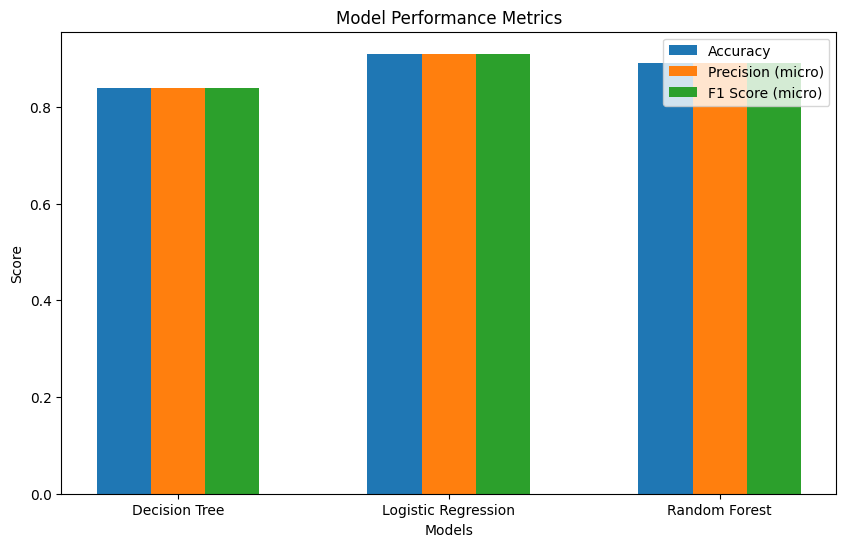

In [ ]:
models = ['Decision Tree', 'Logistic Regression', 'Random Forest']
accuracy = [dt_accuracy, log_reg_accuracy, rf_accuracy]
precision = [dt_precision_micro, log_reg_precision_micro, rf_precision_micro]
f1_score = [dt_f1_micro, log_reg_f1_micro, rf_f1_micro]

x = range(len(models))
plt.figure(figsize=(10, 6))

plt.bar(x, accuracy, width=0.2, label='Accuracy')
plt.bar([i + 0.2 for i in x], precision, width=0.2, label='Precision (micro)')
plt.bar([i + 0.4 for i in x], f1_score, width=0.2, label='F1 Score (micro)')

plt.xticks([i + 0.2 for i in x], models)
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.legend()
plt.show()

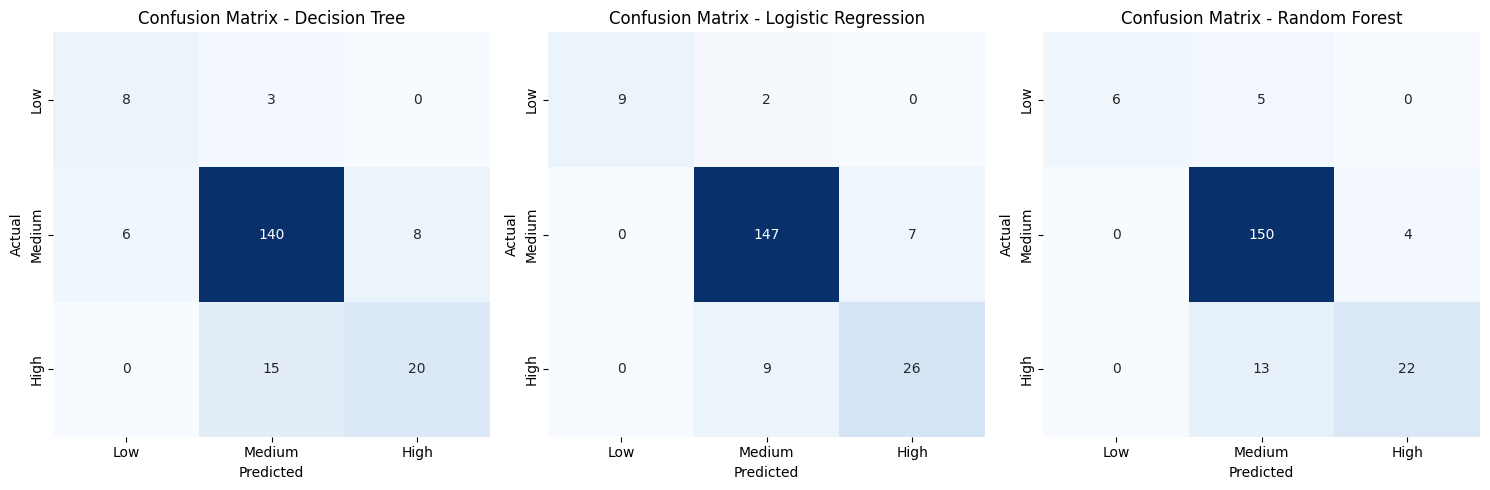

In [ ]:
from sklearn.metrics import confusion_matrix

class_labels = ['Low', 'Medium', 'High']
y_test_mapped = [class_labels.index(label) for label in y_test]
dt_predictions_mapped = [class_labels.index(label) for label in dt_predictions]
log_reg_predictions_mapped = [class_labels.index(label) for label in log_reg_predictions]
rf_predictions_mapped = [class_labels.index(label) for label in rf_predictions]

confusion_matrices = [confusion_matrix(y_test_mapped, dt_predictions_mapped),
                      confusion_matrix(y_test_mapped, log_reg_predictions_mapped),
                      confusion_matrix(y_test_mapped, rf_predictions_mapped)]

models = ['Decision Tree', 'Logistic Regression', 'Random Forest']

plt.figure(figsize=(15, 5))

for i, matrix in enumerate(confusion_matrices):
    plt.subplot(1, 3, i + 1)
    sns.heatmap(matrix, annot=True, cmap='Blues', fmt='d', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix - {models[i]}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [ ]:
# Feature Selection using Feature Importance
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Creating a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df)

# Selecting top 3 important features
top_n = 3
selected_features = importance_df.head(top_n)['Feature'].tolist()
print(f"Selected top {top_n} features:", selected_features)

Feature Importances:
                                           Feature  Importance
0                                    reading score    0.345250
1                                    writing score    0.325391
3                                      gender_male    0.051268
2                                    gender_female    0.042603
8                           race/ethnicity_group E    0.033942
15                              lunch_free/reduced    0.025769
16                                  lunch_standard    0.024112
9   parental level of education_associate's degree    0.018005
14    parental level of education_some high school    0.015242
17               test preparation course_completed    0.014898
6                           race/ethnicity_group C    0.013923
7                           race/ethnicity_group D    0.013371
18                    test preparation course_none    0.012812
11         parental level of education_high school    0.012646
10   parental level of education_b

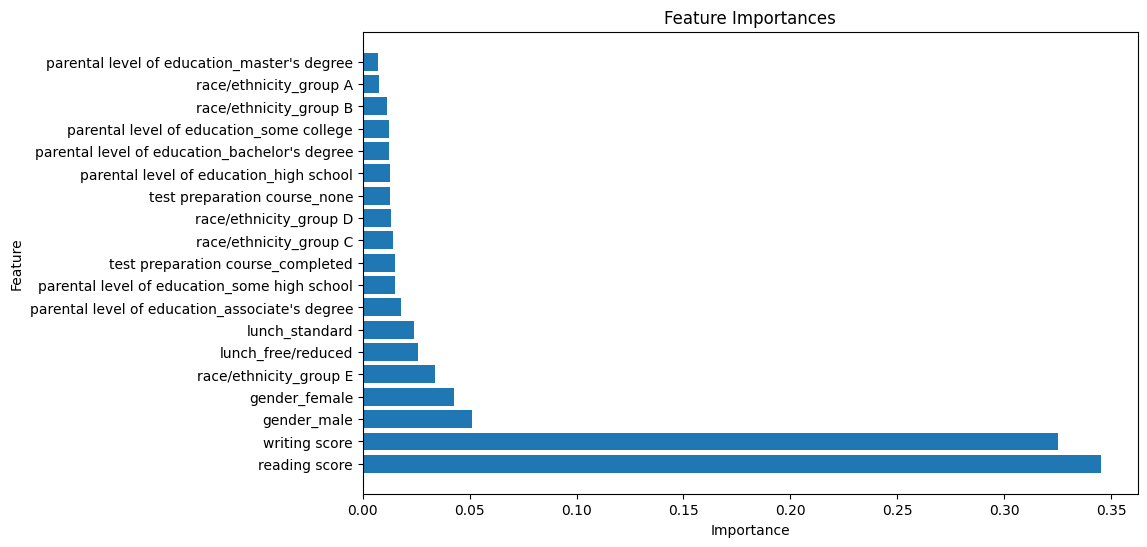

In [ ]:
# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

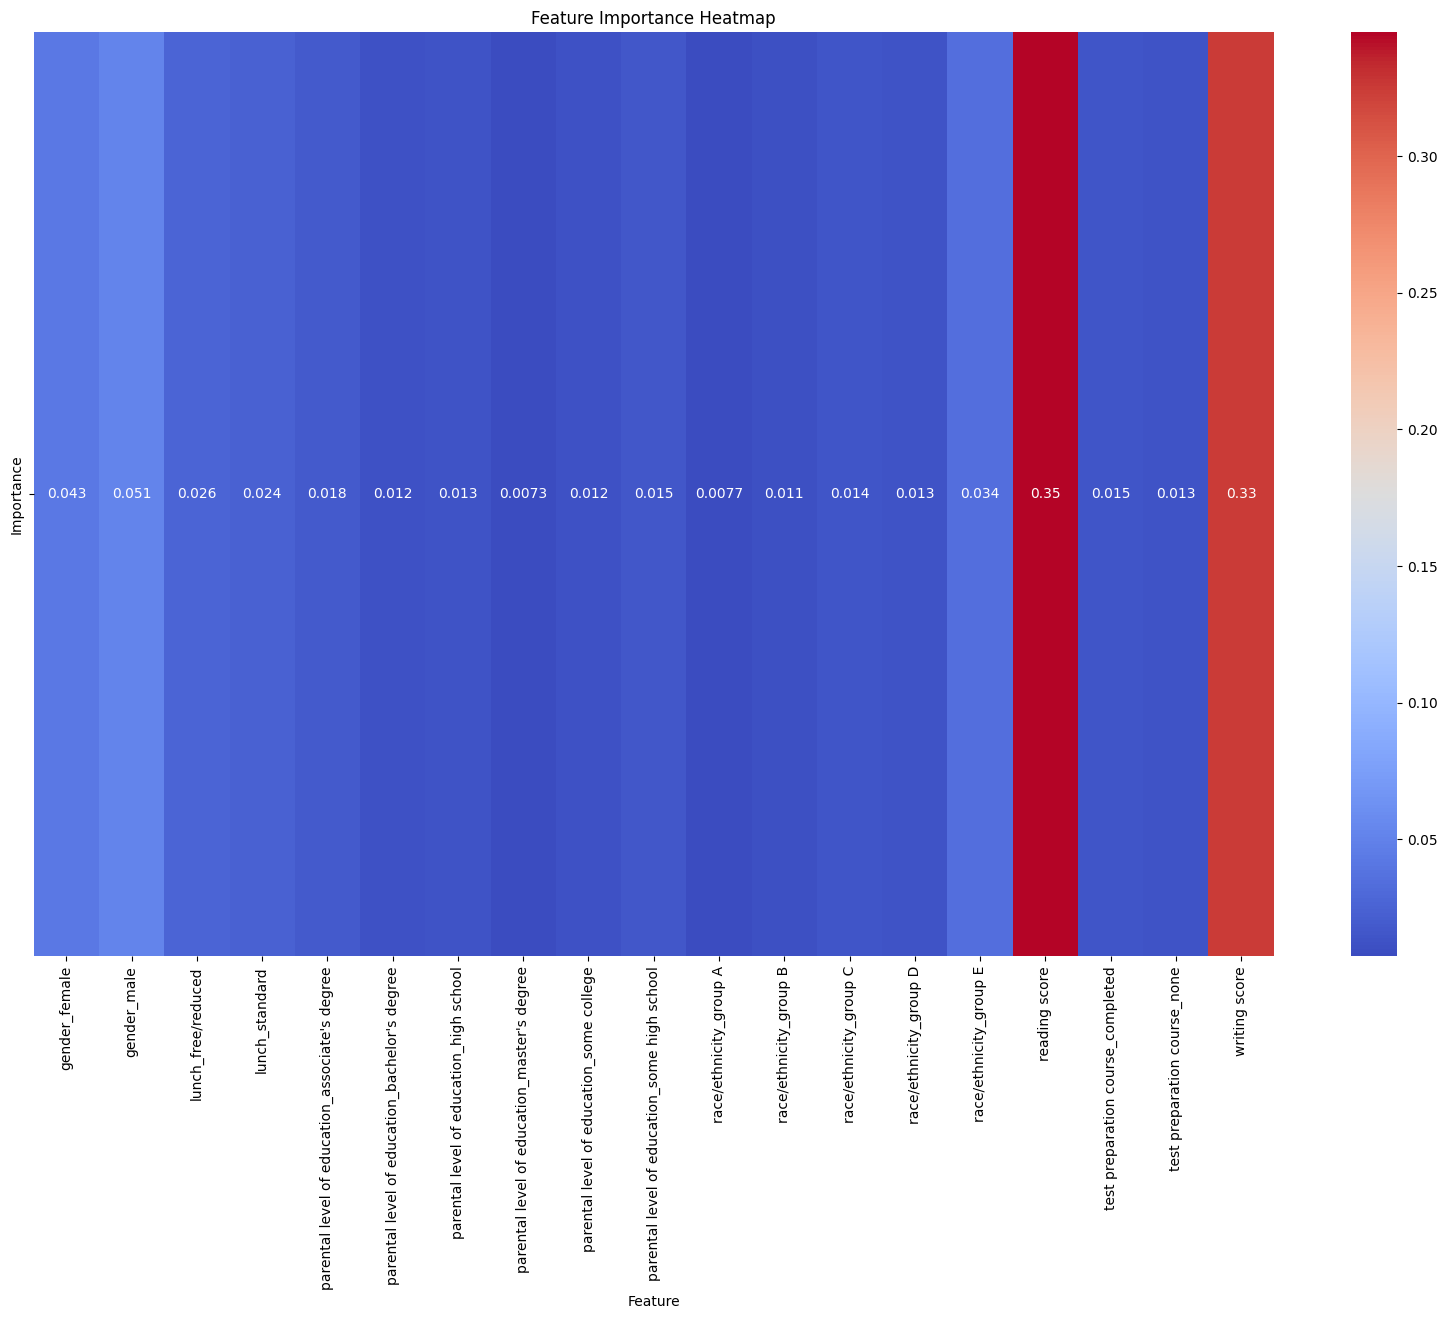

In [ ]:
# Creating a heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(importance_df.pivot_table(index='Feature', values='Importance').T, cmap='coolwarm', annot=True)
plt.title('Feature Importance Heatmap')
plt.show()